In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, LSTM,Input
from livelossplot import PlotLossesKeras
from sklearn.preprocessing import MinMaxScaler
import keras

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
training_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [4]:
len(training_set)

2035

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [31]:
xtrain=[]
ytrain=[]
for i in range(60, 2035):
    xtrain.append(training_set_scaled[i-60:i, 0])
    ytrain.append(training_set_scaled[i, 0])
xtrain, ytrain = np.array(xtrain), np.array(ytrain)
xtrain = np.reshape(xtrain, (xtrain.shape[0], x.shape[1], 1))

In [32]:
x.shape

(1975, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(xtrain.shape[1:])))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=(['accuracy']))
model.fit(xtrain,ytrain,epochs=100,batch_size=32)

### Test Data

In [35]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values

In [42]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

In [45]:
dataset_test.iloc[:, 0:2].values,dataset_train.iloc[:, 0:2].values
len(dataset_total)-len(dataset_test),len(dataset_train)

(2035, 2035)

In [47]:
#dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
xtest = []
for i in range(60, 76):
    xtest.append(inputs[i-60:i, 0])
xtest = np.array(xtest)
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], 1))
predicted_stock_price = model.predict(xtest)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

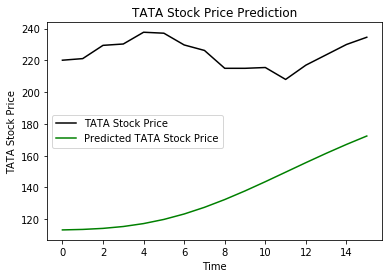

In [48]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()